<a href="https://colab.research.google.com/github/alexshamblin879/Alex-Shamblin/blob/main/DS_Unit_4_Sprint_Challenge_13_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint Challenge
## *Data Science Sprint 13*

After a sprint of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). The data is sampled for you to something more manageable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge.

## Challenge Objectives
Successfully complete all these objectives to earn full credit.

**Successful completion is defined as passing all the unit tests in each objective.**  

There are 8 total possible points in this sprint challenge.


There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on Yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu.

3) **Comment out the cell that generates a pyLDAvis visual in objective 4 (see instructions in that section).**
____

### Part 0: Import Necessary Packages
For this section, you will need to import:
- `spacy`
- `Pandas`
- `Seaborn`
- `Matplotlib`
- `NearestNeighbors`
- `Pipeline`
- `TfidfVectorizer`
- `KneighborsClassifier`
- `GridSearchCV`
- `corpora`
- `LdaModel`
- `gensim`
- `re`

> **Note: This assignment is optimized to work with these specific packages. You can use import different packages, but note that this may affect how CodeGrade works, and may cause CodeGrade to fail.**

In [1]:
# YOUR CODE HERE
import spacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from gensim import corpora
from gensim.models import LdaModel
import re

In [2]:
# Visible Testing
assert pd.__package__ == 'pandas'




### Part 0: Import Data

In [3]:
import pandas as pd
import json

# Load reviews from URL
data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_4/unit1_nlp/review_sample.json'

#Import data into a DataFrame named df
# Read the data as a string
data = pd.read_json(data_url, lines=True)  # lines=True to read data line by line

# Convert to DataFrame
df = pd.DataFrame(data)

In [4]:
# Visible Testing
assert isinstance(df, pd.DataFrame), 'df is not a DataFrame. Did you import the data into df?'
assert df.shape[0] == 10000, 'DataFrame df has the wrong number of rows.'

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- Accept one document at a time
- Return a list of tokens

You are free to use any method you have learned this week.

**TO PASS CODEGRADE RUNTIME:**
- Do not run your tokenize function more than one time in your notebook! It is not needed until Part 4!

In [5]:
# Optional: Consider using spaCy in your function. The spaCy library can be imported by running this cell.
# A pre-trained model (en_core_web_sm) has been made available to you in the CodeGrade container.
# If you DON'T need use the en_core_web_sm model, you can comment it out below.

nlp = spacy.load('en_core_web_sm')

In [6]:
#YOUR CODE HERE

def tokenize(doc):
  tokenized_doc = nlp(doc)
  tokens = [token.text for token in tokenized_doc]
  return tokens



In [7]:
'''Testing'''
assert isinstance(tokenize(df.sample(n=1)["text"].iloc[0]), list), "Make sure your tokenizer function accepts a single document and returns a list of tokens!"

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews (i.e. create a doc-term matrix).
    * Name that doc-term matrix `dtm`

In [8]:
%%time
# YOUR CODE HERE
dtm = TfidfVectorizer(tokenizer=tokenize)
dtm = dtm.fit_transform(df.text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CPU times: user 4min 55s, sys: 732 ms, total: 4min 56s
Wall time: 5min 19s



2. Write a fake review. Assign the text of the review to an object called `fake_review`.
3. Query the fake review for the 10 most similar reviews, print the text of the reviews.
    - Given the size of the dataset, use `NearestNeighbors` model for this. Name the model `nn`.

In [9]:
# Create and fit a NearestNeighbors model named "nn"
# YOUR CODE HERE
nn = NearestNeighbors(n_neighbors=10)
nn.fit(dtm)

NearestNeighbors(n_neighbors=10)

In [10]:
'''Testing.'''
assert nn.__module__ == 'sklearn.neighbors._unsupervised', ' nn is not a NearestNeighbors instance.'
assert nn.n_neighbors == 10, 'nn has the wrong value for n_neighbors'

In [11]:
# Create a fake review and find the 10 most similar reviews

# YOUR CODE HERE
fake_review = "This is a fake review. It is not in the dataset."
similarity, indices = nn.kneighbors(dtm[dtm.shape[0]-1])

In [12]:
# Visible Testing
assert isinstance(fake_review, str), "Did you write a review in the correct data type?"

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset.

1. Create a pipeline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier.
    - Use that pipeline to train a model to predict the `stars` feature (i.e. the labels).
    - Use that pipeline to predict a star rating for your fake review from Part 2.



2. Create a parameter dict including `one parameter for the vectorizer` and `one parameter for the model`.
    - Include 2 possible values for each parameter
        - **Keep the values for each parameter low. Extreme values will compromise runtime**
    - **Use `n_jobs` = 1**
    - Due to limited computational resources on CodeGrader `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE.`
    
    
3. Train the entire pipeline with a GridSearch
    - Name your GridSearch object as `gs`

In [22]:
# YOUR CODE HERE

def review_to_vector(review):
  return dtm[dtm.shape[0]-1]

n_jobs = 1

# YOUR CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression # Example classifier
from sklearn.model_selection import GridSearchCV

# 1. Create a pipeline object
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Using TfidfVectorizer
    ('classifier', LogisticRegression()),  # Example classifier
])

# 2. Create a parameter dict
param_grid = {
    'tfidf__max_features': [1000, 2000],  # Parameter for vectorizer
    'classifier__C': [0.1, 1.0],  # Parameter for classifier
}

# 3. Train the pipeline with GridSearchCV
gs = GridSearchCV(pipeline, param_grid, n_jobs=1)
gs.fit(df['text'], df['stars'])  # Fitting to training data

# Predict star rating for the fake review
prediction = gs.predict([fake_review])[0]
print(f"Predicted star rating for fake review: {prediction}")

Predicted star rating for fake review: 1


In [23]:
# Visible Testing
prediction = gs.predict(["This is your prediction statement."])[0]
assert prediction in df.stars.values, 'You gs object should be able to accept raw text within a list. Did you include a vectorizer in your pipeline?'

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Set num_topics to `5`
    - Name your LDA model `lda`
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations.
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

When you instantiate your LDA model, it should look like this:

```python
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = num_topics,
               passes=1
              )

```

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

## Note about  pyLDAvis

**pyLDAvis** is the Topic modeling package that we used in class to visualize the topics that LDA generates for us.

You are welcomed to use pyLDAvis if you'd like for your visualization. However, **you MUST comment out the code that imports the package and the cell that generates the visualization before you submit your notebook to CodeGrade.**

Although you should leave the print out of the visualization for graders to see (i.e. comment out the cell after you run it to create the viz).

### 1. Estimate a LDA topic model of the review text

* Use the `tokenize` function you created earlier to create tokens.
* Create an `id2word` object.
> Hint: Use `corpora.Dictionary`
* Create a `corpus` object.
> Hint: Use `id2word.doc2bow`
* Instantiate an `lda` model.

>> Remember to read the LDA docs for more information on the various class attributes and methods available to you in the LDA model: https://radimrehurek.com/gensim/models/ldamodel.html

In [24]:
# Do not change this value
num_topics = 5

In [25]:
# YOUR CODE HERE
from gensim import corpora
from gensim.models import LdaModel

# Assuming you have already defined the 'tokenize' function and 'num_topics' variable

# Tokenize the reviews
tokenized_reviews = [tokenize(review) for review in df['text']]

# Create an id2word object
id2word = corpora.Dictionary(tokenized_reviews)

# Create a corpus object
corpus = [id2word.doc2bow(review) for review in tokenized_reviews]

# Instantiate an lda model
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics=num_topics,
               passes=1)

#### Testing

In [26]:
# Visible Testing

assert lda.get_topics().shape[0] == 5, 'Did your model complete its training? Did you set num_topics to 5?'

#### 2. Create 2 visualizations of the results:
1. Create a visualization using pyLDAvis. Run the cell, then comment out your code before submission, leaving the visualization in the cell.

2. Create a visualization using the matplotlib library and utilizing the subplots function. Assign this visualization to a variable called `visual_plot`.


In [31]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.3 MB/s eta 0:00:00


In [35]:
# Cell for pyLDAvis visualization
# YOUR CODE HERE
import pyLDAvis #Fixed: Added pyLDAvis to imports
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# Visualize the topics
vis_data = gensimvis.prepare(lda, corpus, id2word)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


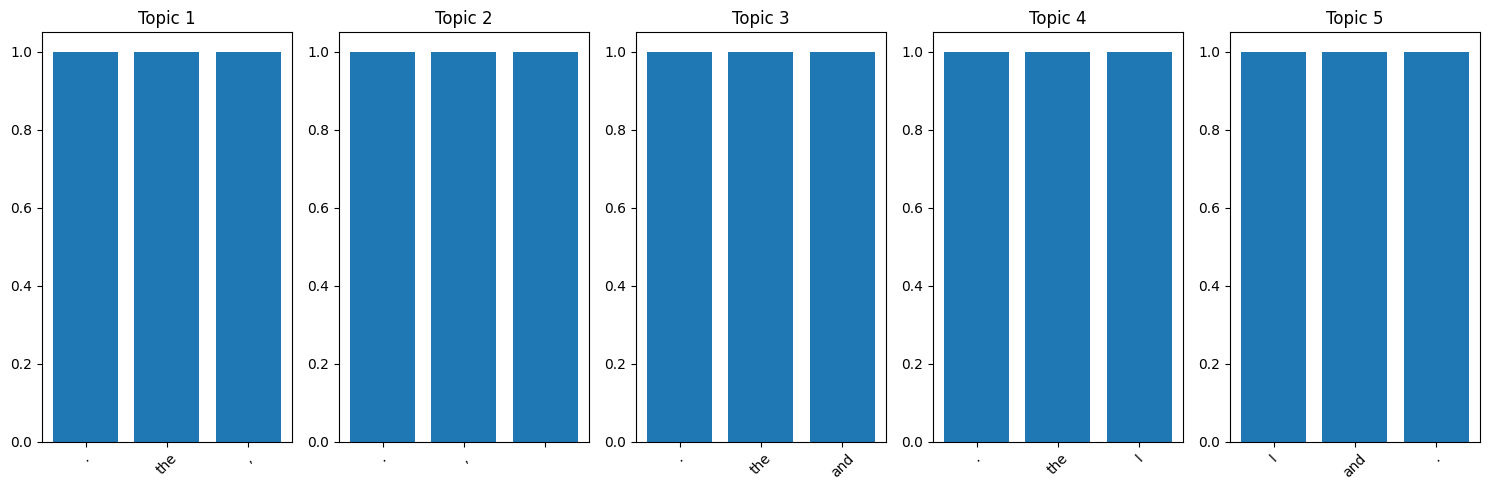

In [33]:
# Cell for matplotlib visualzation
# YOUR CODE HERE
import matplotlib.pyplot as plt

# Get the top 3 words for each topic
top_words = [[word for word, prob in lda.show_topic(i, topn=3)] for i in range(num_topics)]

# Create subplots
fig, axes = plt.subplots(1, num_topics, figsize=(15, 5))

# Plot the top words for each topic
for i, ax in enumerate(axes):
    ax.bar(top_words[i], [1, 1, 1])  # Bar chart for top words
    ax.set_title(f'Topic {i + 1}')  # Set subplot title
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout and assign to visual_plot
plt.tight_layout()  # Improve spacing
visual_plot = plt  # Assign the plot to visual_plot

In [34]:
# Visible testing
assert visual_plot is not None, "Variable 'visual_plot' is not created."

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
